In [15]:
from torchvision import datasets, transforms
from torch import nn
from torch.utils.data import DataLoader, Dataset
from matplotlib import pyplot as plt
from typing import List, Set
import numpy as np

In [3]:
Transform = transforms.ToTensor()
data_train = datasets.MNIST(root="mnist", train=True, download=True, transform=Transform)
data_test = datasets.MNIST(root="mnist", train=False, download=True, transform=Transform)

In [4]:
img, y_true = data_train[0]

In [5]:
img.numpy().shape

(1, 28, 28)

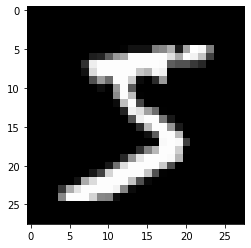

In [7]:
plt.imshow(np.moveaxis(img.numpy(), [0, 1, 2], [2, 0, 1]), cmap="gray")

In [8]:
y_true

5

In [12]:
def make_reduced_dataset(dataset: Dataset, numbers: Set[int]):
    num2idx = {num: idx for idx, num in enumerate(numbers)}
    num_set = set(numbers)
    for img, y_true in dataset:
        if y_true not in num_set:
            continue
        yield num2idx[y_true], img
        

class ReducedMNIST(Dataset):
    def __init__(self):
        self.__imgs = []
        self.__y_true = []
    
    def add(self, y_true, img):
        self.__imgs.append(img)
        self.__y_true.append(y_true)

    def __len__(self):
        return len(self.__y_true)

    def __getitem__(self, idx):
        return self.__imgs[idx], self.__y_true[idx]


Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
train_ldr = DataLoader(data_train, batch_size=100, shuffle=True)
test_ldr = DataLoader(data_test, batch_size=100, shuffle=True)

In [ ]:
class PyTorchMLP(nn.Module):

    def __init__(self):
        super().__init__()
        self.__layers = [
            nn.Linear(in_features=28*28, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=84),
            nn.ReLU(),
            nn.Linear(in_features=84, out_features=1),
            nn.Sigmoid()
        ]

In [10]:
help(nn.Linear)

Help on class Linear in module torch.nn.modules.linear:

class Linear(torch.nn.modules.module.Module)
 |  Linear(in_features: int, out_features: int, bias: bool = True) -> None
 |  
 |  Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
 |  
 |  This module supports :ref:`TensorFloat32<tf32_on_ampere>`.
 |  
 |  Args:
 |      in_features: size of each input sample
 |      out_features: size of each output sample
 |      bias: If set to ``False``, the layer will not learn an additive bias.
 |          Default: ``True``
 |  
 |  Shape:
 |      - Input: :math:`(N, *, H_{in})` where :math:`*` means any number of
 |        additional dimensions and :math:`H_{in} = \text{in\_features}`
 |      - Output: :math:`(N, *, H_{out})` where all but the last dimension
 |        are the same shape as the input and :math:`H_{out} = \text{out\_features}`.
 |  
 |  Attributes:
 |      weight: the learnable weights of the module of shape
 |          :math:`(\text{out\_features}, \t